In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import calendar
import sys
sys.path.append('../')  # Add the parent folder to the Python path

from sql_functions import get_dataframe  # Import the function

main_cities = [
    "New York, NY",
    "Washington, DC",
    "Baltimore, MD"
    "Philadelphia, PA"
]

side_cities = [
    "Miami, FL",
    "Houston, TX",
    "San Francisco, CA",
    "Seattle, WA"
]


## 1 Hypotheses: **In the weather data we are able to see the weather event**

In [2]:
%store -r weather_main_cities
%store -r weather_main_cities_rest_2016
%store -r weather_other_cities
%store -r weather_other_cities_rest_2016

In [3]:
weather_main_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 812
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               813 non-null    datetime64[ns]
 1   avg_temp_°C        813 non-null    float64       
 2   min_temp_°C        813 non-null    float64       
 3   max_temp_°C        813 non-null    float64       
 4   rainfall_mm        813 non-null    float64       
 5   snowfall_mm        542 non-null    float64       
 6   avg_windspeed_kmh  813 non-null    float64       
 7   city_name          813 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 57.2+ KB


In [4]:
weather_main_cities_rest_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               825 non-null    datetime64[ns]
 1   avg_temp_°C        825 non-null    float64       
 2   min_temp_°C        825 non-null    float64       
 3   max_temp_°C        825 non-null    float64       
 4   rainfall_mm        825 non-null    float64       
 5   snowfall_mm        550 non-null    float64       
 6   avg_windspeed_kmh  825 non-null    float64       
 7   city_name          825 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 51.7+ KB


In [5]:
weather_other_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1084 non-null   datetime64[ns]
 1   avg_temp_°C        1084 non-null   float64       
 2   min_temp_°C        1084 non-null   float64       
 3   max_temp_°C        1084 non-null   float64       
 4   rainfall_mm        1084 non-null   float64       
 5   snowfall_mm        548 non-null    float64       
 6   avg_windspeed_kmh  1084 non-null   float64       
 7   city_name          1084 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 67.9+ KB


In [6]:
weather_other_cities_rest_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1100 non-null   datetime64[ns]
 1   avg_temp_°C        1100 non-null   float64       
 2   min_temp_°C        1100 non-null   float64       
 3   max_temp_°C        1100 non-null   float64       
 4   rainfall_mm        1100 non-null   float64       
 5   snowfall_mm        550 non-null    float64       
 6   avg_windspeed_kmh  1100 non-null   float64       
 7   city_name          1100 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 68.9+ KB


## Merging DataFrames of whole main cities (first API and rest of 2016)

In [7]:
weather_main_df = pd.merge(weather_main_cities, weather_main_cities_rest_2016, how='outer')

In [8]:
weather_main_df

,date,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh,city_name
0,2015-01-01,0.3,-2.1,4.4,0.0,0.0,27.7,"New York, NY"
1,2015-01-02,4.1,1.7,7.2,0.0,0.0,22.0,"New York, NY"
2,2015-01-03,2.5,-1.0,8.3,23.9,0.0,14.8,"New York, NY"
3,2015-01-04,8.5,6.1,12.8,11.9,0.0,16.2,"New York, NY"
4,2015-01-05,6.1,-4.9,10.6,0.0,0.0,31.7,"New York, NY"
...,...,...,...,...,...,...,...,...
1633,2016-11-26,9.2,5.6,11.1,0.0,0.0,20.2,"Washington, DC"
1634,2016-11-27,7.5,3.9,12.2,0.0,0.0,9.4,"Washington, DC"
1635,2016-11-28,6.4,1.7,12.2,0.0,0.0,10.4,"Washington, DC"
1636,2016-11-29,11.9,8.9,17.2,3.0,0.0,7.9,"Washington, DC"


In [9]:
weather_others_df = pd.merge(weather_other_cities, weather_other_cities_rest_2016, how='outer')

In [10]:
weather_others_df

,date,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh,city_name
0,2015-01-01,23.8,21.1,27.8,0.0,NaN,8.3,"Miami, FL"
1,2015-01-02,24.8,22.2,28.3,0.3,NaN,14.4,"Miami, FL"
2,2015-01-03,25.6,24.4,28.3,0.0,NaN,18.7,"Miami, FL"
3,2015-01-04,25.7,23.3,28.3,0.0,NaN,14.0,"Miami, FL"
4,2015-01-05,25.2,22.2,28.9,0.5,NaN,9.7,"Miami, FL"
...,...,...,...,...,...,...,...,...
2179,2016-11-26,9.4,6.1,10.6,9.7,0.0,10.8,"Seattle, WA"
2180,2016-11-27,6.9,5.6,8.3,8.1,0.0,16.2,"Seattle, WA"
2181,2016-11-28,7.1,4.4,10.0,0.0,0.0,10.1,"Seattle, WA"
2182,2016-11-29,7.6,5.0,10.6,1.0,0.0,10.1,"Seattle, WA"


In [ ]:
%store weather_main_df
%store weather_others_df

---

# Dates only during Jonas

In [11]:
weather_main_jonas = weather_main_df[(weather_main_df['date'] >= '2016-01-01') & (weather_main_df['date'] <= '2016-02-28')] #.set_index('date', inplace=True)

In [12]:
# Set date as index
weather_main_jonas.set_index('date', inplace=True)

In [13]:
weather_main_jonas

,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh,city_name
date,,,,,,,
2016-01-01,5.8,2.2,6.7,0.0,0.0,23.4,"New York, NY"
2016-01-02,3.1,1.1,5.0,0.0,0.0,20.9,"New York, NY"
2016-01-03,4.6,1.7,8.9,0.0,0.0,22.7,"New York, NY"
2016-01-04,1.0,-9.3,3.3,0.0,0.0,32.0,"New York, NY"
2016-01-05,-7.2,-11.0,-1.6,0.0,0.0,19.8,"New York, NY"
...,...,...,...,...,...,...,...
2016-02-24,8.8,5.6,18.3,27.9,0.0,16.9,"Washington, DC"
2016-02-25,10.9,4.4,15.6,0.0,0.0,27.7,"Washington, DC"
2016-02-26,3.8,-0.5,4.4,0.0,0.0,25.9,"Washington, DC"


## Jonas + New York

In [14]:
weather_main_jonas_newyork = weather_main_jonas[weather_main_jonas['city_name'] == 'New York, NY']

In [17]:
weather_main_jonas_newyork['city_name'].unique()

array(['New York, NY'], dtype=object)

In [34]:
weather_main_jonas_newyork.describe().round(2)

,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh
count,59.00,59.00,59.00,59.00,59.00,59.00
mean,2.27,-1.85,6.09,3.70,62.37,21.30
std,4.96,4.98,5.27,11.33,155.49,8.61
min,-13.10,-17.10,-8.20,0.00,0.00,5.80
25%,-1.05,-4.60,3.60,0.00,0.00,15.50
50%,3.00,-1.60,5.60,0.00,0.00,20.90
75%,5.85,1.95,9.45,0.50,30.00,25.35
max,11.60,6.10,15.60,73.70,710.00,40.30


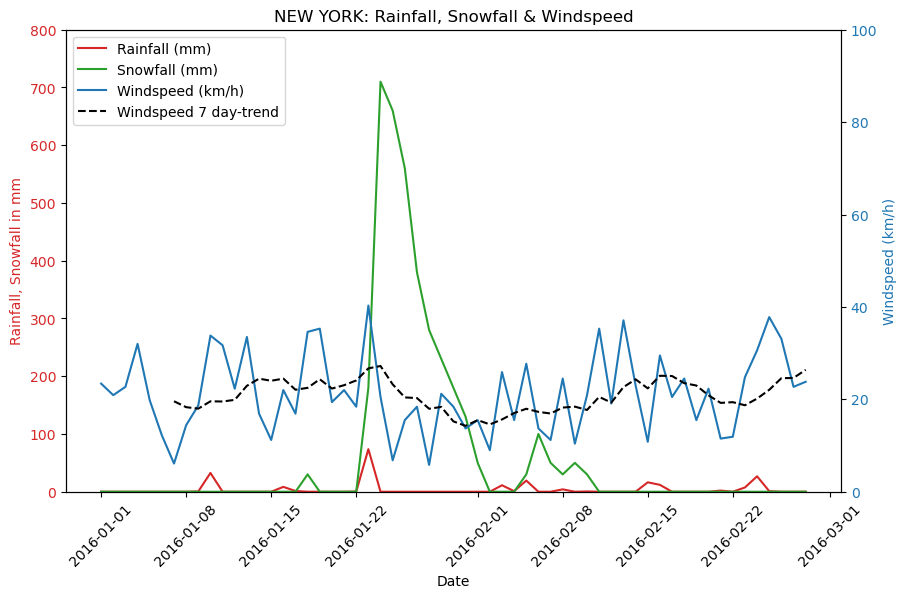

In [59]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# first y-Axis (Rainfall, Snowfall)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall, Snowfall in mm', color='tab:red')
ax1.plot(weather_main_jonas_newyork.index, weather_main_jonas_newyork['rainfall_mm'], color='tab:red', label='Rainfall (mm)')
ax1.plot(weather_main_jonas_newyork.index, weather_main_jonas_newyork['snowfall_mm'], color='tab:green', label='Snowfall (mm)')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(0, 800)

# second y-axis (Windspeed)
ax2 = ax1.twinx()
ax2.set_ylabel('Windspeed (km/h)', color='tab:blue')
ax2.plot(weather_main_jonas_newyork.index, weather_main_jonas_newyork['avg_windspeed_kmh'], color='tab:blue', label='Windspeed (km/h)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 100)

# Add a Trendline for Windspeed
windspeed_trend = weather_main_jonas_newyork['avg_windspeed_kmh'].rolling(window=7).mean()  # Moving average over 7 days 
ax2.plot(weather_main_jonas_newyork.index, windspeed_trend, '--k', label='Windspeed 7 day-trend')

# Legende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate the x-axis labelling by 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

plt.title('NEW YORK: Rainfall, Snowfall & Windspeed')
plt.show()

## Jonas + Washington D.C.

In [52]:
weather_main_jonas_washington = weather_main_jonas[weather_main_jonas['city_name'] == 'Washington, DC']

In [53]:
weather_main_jonas_washington['city_name'].unique()

array(['Washington, DC'], dtype=object)

In [54]:
weather_main_jonas_washington.describe().round(2)

,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh
count,59.00,59.00,59.00,59.00,59.00,59.00
mean,2.71,-1.37,7.04,2.78,34.58,15.69
std,4.89,4.64,5.78,6.20,98.46,6.77
min,-7.80,-10.50,-3.20,0.00,0.00,3.60
25%,-1.85,-4.90,3.30,0.00,0.00,11.20
50%,3.10,-1.00,6.70,0.00,0.00,14.40
75%,6.25,2.20,11.70,0.90,0.00,19.05
max,12.50,7.20,18.30,27.90,460.00,36.70


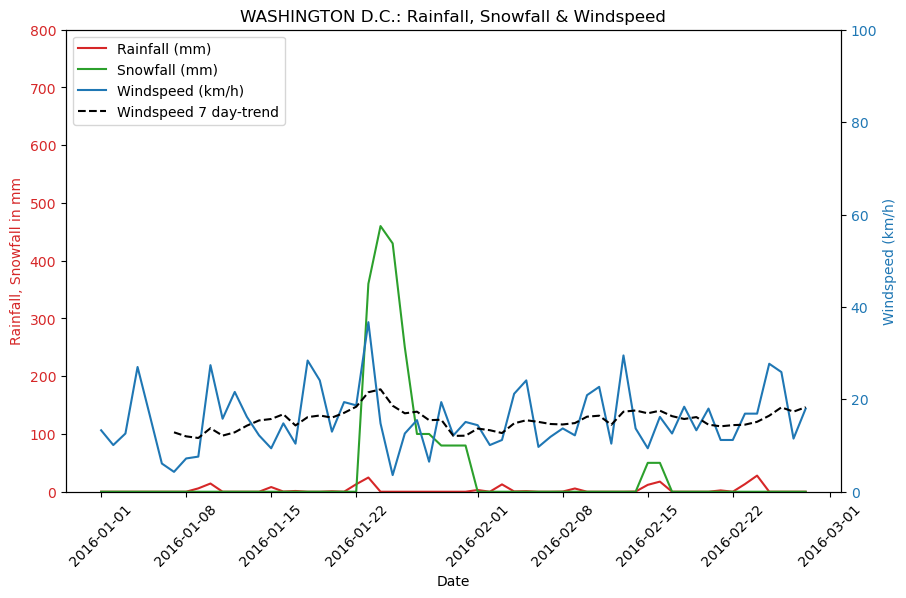

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# first y-Axis (Rainfall, Snowfall)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall, Snowfall in mm', color='tab:red')
ax1.plot(weather_main_jonas_washington.index, weather_main_jonas_washington['rainfall_mm'], color='tab:red', label='Rainfall (mm)')
ax1.plot(weather_main_jonas_washington.index, weather_main_jonas_washington['snowfall_mm'], color='tab:green', label='Snowfall (mm)')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(0, 800)

# second y-axis (Windspeed)
ax2 = ax1.twinx()
ax2.set_ylabel('Windspeed (km/h)', color='tab:blue')
ax2.plot(weather_main_jonas_washington.index, weather_main_jonas_washington['avg_windspeed_kmh'], color='tab:blue', label='Windspeed (km/h)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 100)

# Add a Trendline for Windspeed
windspeed_trend = weather_main_jonas_washington['avg_windspeed_kmh'].rolling(window=7).mean()  # Moving average over 7 days 
ax2.plot(weather_main_jonas_washington.index, windspeed_trend, '--k', label='Windspeed 7 day-trend')

# Legende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate the x-axis labelling by 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

plt.title('WASHINGTON D.C.: Rainfall, Snowfall & Windspeed')
plt.show()

## Jonas + Philadelphia

## Jonas + Baltimore

---

# Dates only during Winters

In [64]:
weather_main_winters = weather_main_df[
                            ((weather_main_df['date'] >= '2015-01-01') & (weather_main_df['date'] <= '2016-02-28')) |
                            ((weather_main_df['date'] >= '2015-12-01') & (weather_main_df['date'] <= '2016-02-29')) |
                            ((weather_main_df['date'] >= '2016-12-01') & (weather_main_df['date'] <= '2017-02-28'))
                            ]

In [67]:
weather_main_winters.set_index('date', inplace=True)

In [68]:
weather_main_winters

,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh,city_name
date,,,,,,,
2015-01-01,0.3,-2.1,4.4,0.0,0.0,27.7,"New York, NY"
2015-01-02,4.1,1.7,7.2,0.0,0.0,22.0,"New York, NY"
2015-01-03,2.5,-1.0,8.3,23.9,0.0,14.8,"New York, NY"
2015-01-04,8.5,6.1,12.8,11.9,0.0,16.2,"New York, NY"
2015-01-05,6.1,-4.9,10.6,0.0,0.0,31.7,"New York, NY"
...,...,...,...,...,...,...,...
2017-02-24,17.6,12.2,25.0,0.0,0.0,16.9,"Washington, DC"
2017-02-25,17.2,6.7,23.9,4.6,0.0,23.4,"Washington, DC"
2017-02-26,6.8,1.7,10.0,0.0,0.0,18.0,"Washington, DC"


## Winters + New York

In [69]:
weather_main_winters_newyork = weather_main_winters[weather_main_winters['city_name'] == 'New York, NY']

In [70]:
weather_main_winters_newyork['city_name'].unique()

array(['New York, NY'], dtype=object)

In [71]:
weather_main_winters_newyork.describe().round(2)

,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh
count,240.00,240.00,240.00,240.00,240.00,240.00
mean,2.95,-0.84,6.61,3.22,36.46,20.28
std,5.68,5.96,5.91,8.21,92.75,8.04
min,-13.10,-17.10,-8.20,0.00,0.00,3.20
25%,-0.90,-4.90,2.80,0.00,0.00,14.00
50%,3.25,-0.50,6.40,0.00,0.00,19.10
75%,6.90,3.30,11.10,1.35,30.00,24.80
max,16.40,13.90,21.10,73.70,710.00,44.60


## same graph as during Jonas - but without windspeed:

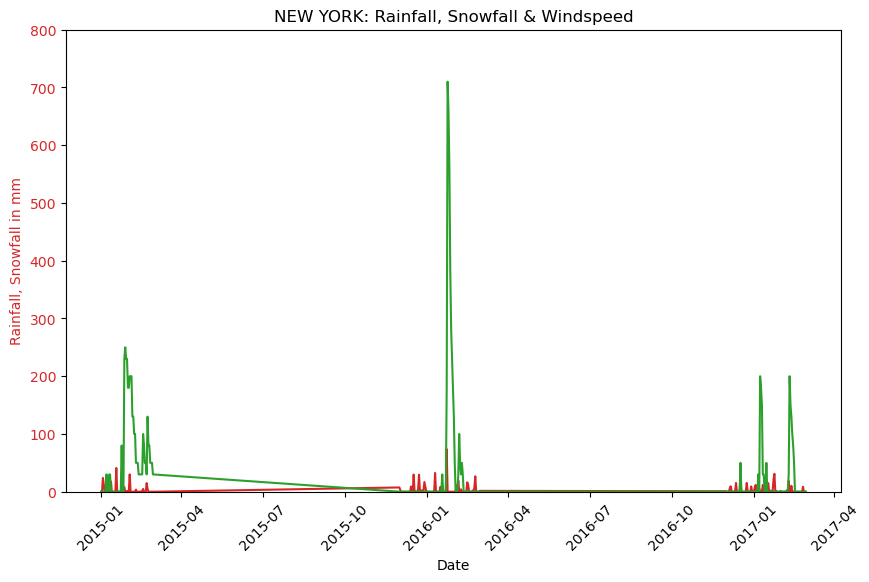

In [73]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# first y-Axis (Rainfall, Snowfall)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall, Snowfall in mm', color='tab:red')
ax1.plot(weather_main_winters_newyork.index, weather_main_winters_newyork['rainfall_mm'], color='tab:red', label='Rainfall (mm)')
ax1.plot(weather_main_winters_newyork.index, weather_main_winters_newyork['snowfall_mm'], color='tab:green', label='Snowfall (mm)')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(0, 800)

# second y-axis (Windspeed)
#ax2 = ax1.twinx()
#ax2.set_ylabel('Windspeed (km/h)', color='tab:blue')
#ax2.plot(weather_main_winters_newyork.index, weather_main_winters_newyork['avg_windspeed_kmh'], color='tab:blue', label='Windspeed (km/h)')
#ax2.tick_params(axis='y', labelcolor='tab:blue')
#ax2.set_ylim(0, 100)

# Add a Trendline for Windspeed
windspeed_trend = weather_main_winters_newyork['avg_windspeed_kmh'].rolling(window=7).mean()  # Moving average over 7 days 
ax2.plot(weather_main_winters_newyork.index, windspeed_trend, '--k', label='Windspeed 7 day-trend')

# Legende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate the x-axis labelling by 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

plt.title('NEW YORK: Rainfall, Snowfall & Windspeed')
plt.show()

---

# only 2016

In [74]:
weather_main_2016 = weather_main_df[
                            ((weather_main_df['date'] >= '2015-12-01') & (weather_main_df['date'] <= '2016-02-29'))
                            ]

In [76]:
weather_main_2016.set_index('date', inplace=True)

In [77]:
weather_main_2016

,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh,city_name
date,,,,,,,
2015-12-01,8.8,7.8,11.7,7.4,0.0,17.6,"New York, NY"
2015-12-02,9.9,8.3,13.9,3.0,0.0,7.2,"New York, NY"
2015-12-03,11.1,7.2,13.3,0.0,0.0,25.9,"New York, NY"
2015-12-04,8.5,5.0,11.7,0.0,0.0,16.9,"New York, NY"
2015-12-05,7.2,1.7,11.7,0.0,0.0,8.6,"New York, NY"
...,...,...,...,...,...,...,...
2016-02-25,10.9,4.4,15.6,0.0,0.0,27.7,"Washington, DC"
2016-02-26,3.8,-0.5,4.4,0.0,0.0,25.9,"Washington, DC"
2016-02-27,2.2,-2.7,8.3,0.0,0.0,11.5,"Washington, DC"


## 2016 + New York

In [78]:
weather_main_2016_newyork = weather_main_2016[weather_main_2016['city_name'] == 'New York, NY']

In [79]:
weather_main_2016_newyork['city_name'].unique()

array(['New York, NY'], dtype=object)

In [81]:
weather_main_2016_newyork.describe().round(2)

,avg_temp_°C,min_temp_°C,max_temp_°C,rainfall_mm,snowfall_mm,avg_windspeed_kmh
count,91.00,91.00,91.00,91.00,91.00,91.00
mean,5.02,1.17,8.76,3.75,40.44,19.47
std,5.80,6.13,5.99,10.16,128.37,8.30
min,-13.10,-17.10,-8.20,0.00,0.00,3.20
25%,0.90,-2.70,4.40,0.00,0.00,13.15
50%,5.50,1.70,8.90,0.00,0.00,18.70
75%,8.90,5.00,13.60,1.50,0.00,23.60
max,16.40,13.90,21.10,73.70,710.00,40.30


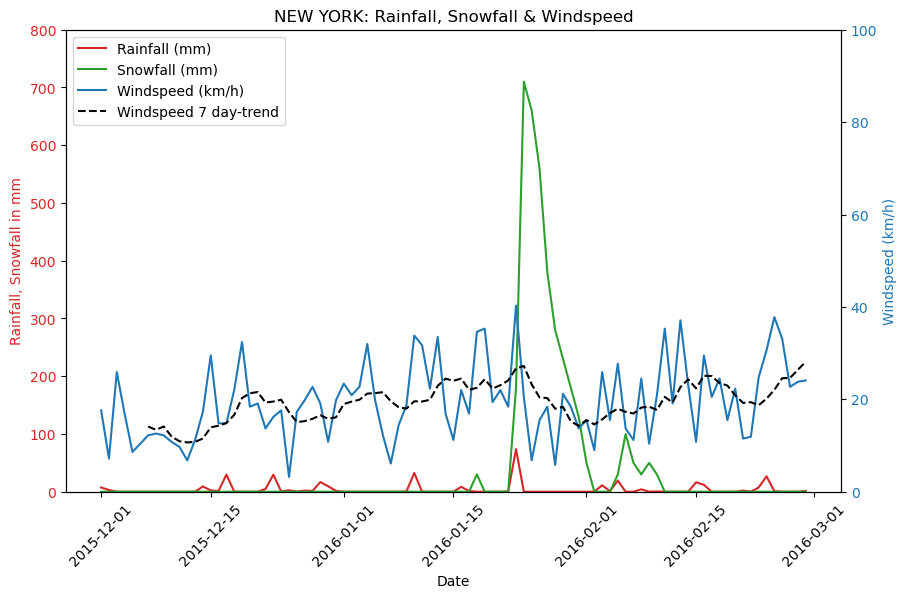

In [83]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# first y-Axis (Rainfall, Snowfall)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall, Snowfall in mm', color='tab:red')
ax1.plot(weather_main_2016_newyork.index, weather_main_2016_newyork['rainfall_mm'], color='tab:red', label='Rainfall (mm)')
ax1.plot(weather_main_2016_newyork.index, weather_main_2016_newyork['snowfall_mm'], color='tab:green', label='Snowfall (mm)')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(0, 800)

# second y-axis (Windspeed)
ax2 = ax1.twinx()
ax2.set_ylabel('Windspeed (km/h)', color='tab:blue')
ax2.plot(weather_main_2016_newyork.index, weather_main_2016_newyork['avg_windspeed_kmh'], color='tab:blue', label='Windspeed (km/h)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 100)

# Add a Trendline for Windspeed
windspeed_trend = weather_main_2016_newyork['avg_windspeed_kmh'].rolling(window=7).mean()  # Moving average over 7 days 
ax2.plot(weather_main_2016_newyork.index, windspeed_trend, '--k', label='Windspeed 7 day-trend')

# Legende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate the x-axis labelling by 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)

plt.title('NEW YORK: Rainfall, Snowfall & Windspeed')
plt.show()

## 2016 + ...